<a href="https://colab.research.google.com/github/princexoleo/machine-learning/blob/master/linear_regression_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression

(0.0, 6.0, 0.0, 20.0)

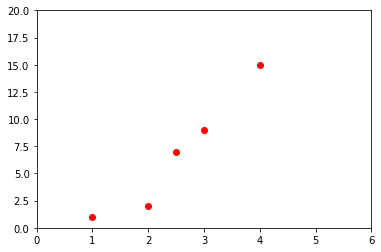

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,2.5,3,4]
y = [1,2,7,9,15]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])

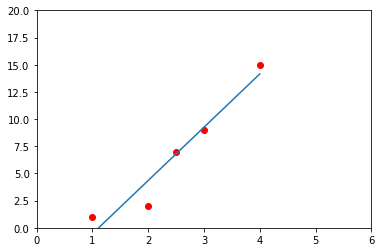

In [0]:
plt.plot(x,y, 'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d( np.polyfit(x,y,1))(np.unique(x)))
plt.show()

In [0]:
import torch
from torch.nn import Linear

In [0]:
# Linear regression y = w*x + b

w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [39]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [41]:
torch.manual_seed(1)
# random value assign to weight(w) and bias (b)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [44]:
# prediction
x = torch.tensor([[2.0],[3.3]])
print("Predicted Value: ",model(x))

Predicted Value:  tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt

Text(0.5, 0, 'X')

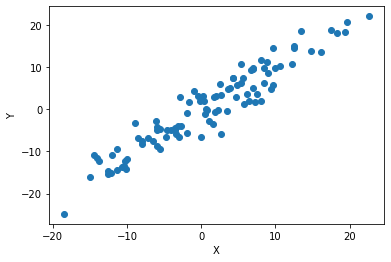

In [107]:
X = torch.randn(100, 1)*10
Y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.ylabel('Y')
plt.xlabel("X")

custom Linear Regression class

In [0]:
class LinearRegreesion(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  # forward
  def forward(self, x):
    pred = self.linear(x)
    return pred



In [108]:
torch.manual_seed(1)
model = LinearRegreesion(1, 1)
print(model)

LinearRegreesion(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [109]:
[w, b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1= b[0].item() # item used for convert into python numbers
print(w1, b1)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [0]:
# custom function for parameters: w and b values
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,Y)
  plt.show()

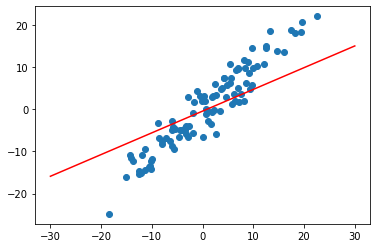

In [111]:
plot_fit("Inital Ploting")

Initially this red line is not suitable for this plot. So we need to reduce error

In [0]:
# mean square error
criterion = nn.MSELoss()
# Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
# if lr is bigger then it will create unwanted converge peak

In [0]:
from tqdm import tqdm

In [119]:
# For training model 
epochs = 100
loss_list = []
for i in tqdm(range(epochs)):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  print("Epoch: ",i, "Loss: ", loss.item())

  optimizer.zero_grad()
  loss_list.append(loss)
  loss.backward() # gradient
  optimizer.step()

100%|██████████| 100/100 [00:00<00:00, 998.77it/s]

Epoch:  0 Loss:  8.991466522216797
Epoch:  1 Loss:  8.99146556854248
Epoch:  2 Loss:  8.991466522216797
Epoch:  3 Loss:  8.991466522216797
Epoch:  4 Loss:  8.991466522216797
Epoch:  5 Loss:  8.991466522216797
Epoch:  6 Loss:  8.991464614868164
Epoch:  7 Loss:  8.99146556854248
Epoch:  8 Loss:  8.991464614868164
Epoch:  9 Loss:  8.991464614868164
Epoch:  10 Loss:  8.991466522216797
Epoch:  11 Loss:  8.991466522216797
Epoch:  12 Loss:  8.99146556854248
Epoch:  13 Loss:  8.991466522216797
Epoch:  14 Loss:  8.99146556854248
Epoch:  15 Loss:  8.99146556854248
Epoch:  16 Loss:  8.99146556854248
Epoch:  17 Loss:  8.991464614868164
Epoch:  18 Loss:  8.99146556854248
Epoch:  19 Loss:  8.99146556854248
Epoch:  20 Loss:  8.991466522216797
Epoch:  21 Loss:  8.99146556854248
Epoch:  22 Loss:  8.991466522216797
Epoch:  23 Loss:  8.991466522216797
Epoch:  24 Loss:  8.991466522216797
Epoch:  25 Loss:  8.991466522216797
Epoch:  26 Loss:  8.991464614868164
Epoch:  27 Loss:  8.99146556854248
Epoch:  28 L

Text(0.5, 0, 'Epochs')

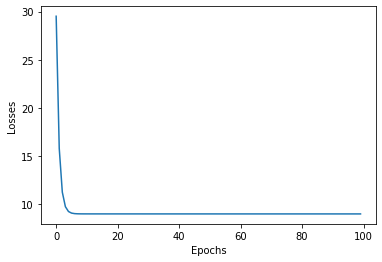

In [115]:
# plot losses
plt.plot(range(epochs), loss_list)
plt.ylabel('Losses')
plt.xlabel('Epochs')

In [59]:
input_sample = torch.tensor([[1.0],[2.0]])
print("Predited: ", model.forward(input_sample))

Predited:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


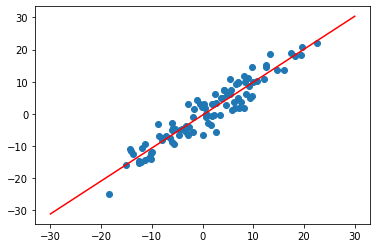

In [116]:
plot_fit("Trained Model")